In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
from pathlib import Path
from solution import parse_readings

inp = Path(os.path.abspath("input.txt")).read_text()
readings = parse_readings(inp)

In [49]:
import itertools
from solution import calculate_deltas, extrapolate


def extrapolate_multiple(reading: list[int], steps: int) -> list[int]:
    res = reading.copy()
    initial_len = len(res)
    for _ in range(steps):
        res.append(extrapolate(res, debug=False))
    return res[initial_len:]


def plot_reading(reading: list[int], ax):
    delta = 6

    x_fit = np.linspace(-delta, len(reading) - 1 + delta, 100)
    degree = len(calculate_deltas(reading)) - 2
    poly_numpy = np.polynomial.Polynomial.fit(np.arange(len(reading)), reading, deg=degree)
    ax.plot(x_fit, [poly_numpy(x) for x in x_fit], label="Numpy fit")

    ax.plot(reading, ".", label="Readings")
    ax.plot(
        list(
            itertools.chain(
                range(-1, -delta - 1, -1),
                range(len(reading), len(reading) + delta),
            )
        ),
        list(
            itertools.chain(
                extrapolate_multiple(reading[::-1], steps=delta),
                extrapolate_multiple(reading, steps=delta),
            )
        ),
        "x",
        color="red",
        label="Extrapolation",
    )

    ax.set_xticks([])
    ax.set_yticks([])

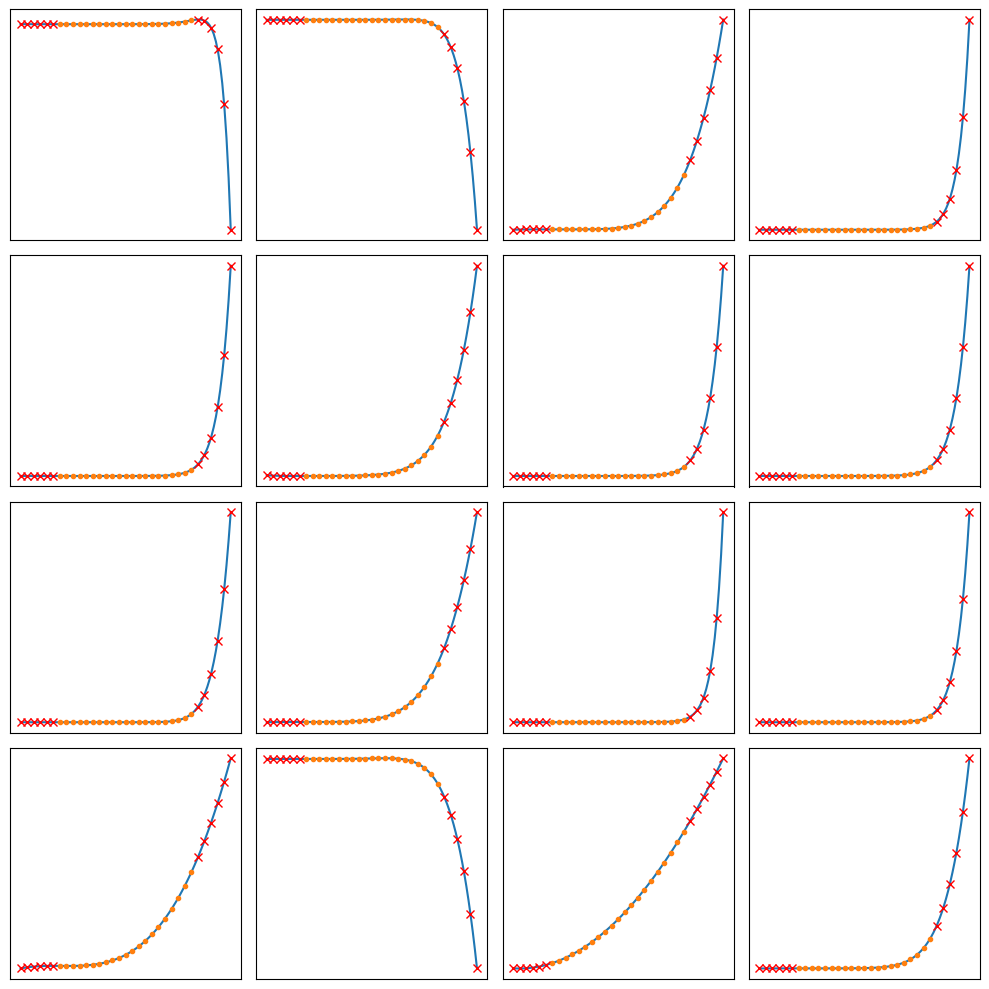

In [51]:
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(10, 10))

for ax_row in axes:
    for ax in ax_row:
        plot_reading(readings[np.random.randint(0, 200)], ax)

fig.tight_layout()